In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import scipy

from Numpy.make_Ab import make_Ab

from Numpy.cg import cg as cg_cpu
from Numpy.gcr import gcr as gcr_cpu
from Numpy.gmres import gmres as gmres_cpu
from Numpy.vpgcr import vpgcr as vpgcr_cpu
from Numpy.vpgmres import vpgmres as vpgmres_cpu

import cupy as cp
from CuPy.SingleGpu.cg import cg as cg_sgpu
from CuPy.SingleGpu.gcr import gcr as gcr_sgpu
from CuPy.SingleGpu.gmres import gmres as gmres_sgpu
from CuPy.SingleGpu.vpgcr import vpgcr as vpgcr_sgpu
from CuPy.SingleGpu.vpgmres import vpgmres as vpgmres_sgpu

In [5]:
n = 2801
matrix_path = f"../../../Matrixes/EFG/matrix_EFG-{n}.txt"
vector_path = f"../../../Matrixes/EFG/vector_EFG-{n}.txt"
A, b, c = make_Ab(matrix_path, path_vector=vector_path, n=n)
ndata = int(c[0])
nbound = int(c[1])

In [6]:
maxiter = n*3

In [ ]:
matrix_path = "../../Matrixes/BCSSTRUC2/bcsstk15_3948.mtx"
A, b = make_Ab(matrix_path)
n = b.shape[0]

## CPU

{'method name': 'GCR', 'residual': array([1.00000000e+00, 9.28965758e-01, 6.45543697e-01, ...,
       1.00061510e-10, 1.00019048e-10, 9.99170895e-11]), 'time': 156.32695730996784, 'iterations': 3778}
9.993498211944377e-11


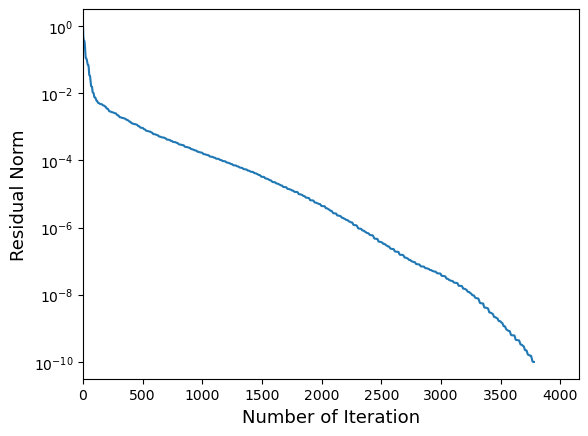

In [4]:
x, info = gcr_cpu(A, b, n, maxiter, tol=1.0e-10, T=np.float64)
print(info)
print(np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ info['iterations']//10)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(info['residual'])
info1 = info['residual']

### VP cpu

{'method name': 'VPGCR', 'residual': array([1.00000000e+00, 5.30933913e-01, 3.80558982e-01, 2.82682657e-01,
       1.54980023e-01, 1.07465452e-01, 8.49755072e-02, 5.53915957e-02,
       3.66088224e-02, 2.94046861e-02, 2.62215728e-02, 2.21434335e-02,
       1.67983195e-02, 1.40989470e-02, 1.19864600e-02, 9.94064880e-03,
       8.72455416e-03, 7.64523179e-03, 6.73444566e-03, 6.00380807e-03,
       5.26562226e-03, 4.61593880e-03, 4.16531864e-03, 3.75809676e-03,
       3.44773081e-03, 3.14800863e-03, 2.87733386e-03, 2.57745717e-03,
       2.33933204e-03, 2.15451135e-03, 2.02857396e-03, 1.88640387e-03,
       1.69983600e-03, 1.55690052e-03, 1.45357707e-03, 1.37770698e-03,
       1.28823489e-03, 1.20775494e-03, 1.13398687e-03, 1.05610281e-03,
       9.89553352e-04, 9.27878779e-04, 8.85318435e-04, 8.43168457e-04,
       7.88153717e-04, 7.46332098e-04, 7.11397478e-04, 6.74646502e-04,
       6.33618616e-04, 5.99527972e-04, 5.73732655e-04, 5.51246630e-04,
       5.28379590e-04, 5.00871146e-04, 4

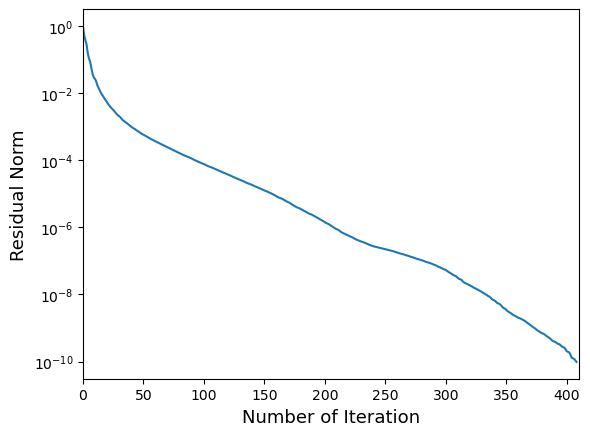

In [19]:
x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, 10, inner_tol=10**(-0.1))
print(info)
print(np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ 2)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(info['residual'])

## Single GPU

{'method name': 'CG', 'residual': array([1.00000000e+00, 9.11611053e-01, 5.52713192e-01, ...,
       2.48949463e-10, 1.25854495e-10, 7.85143175e-11]), 'time': 0.5335733479987539, 'iterations': 1556}
7.85145242419584e-11


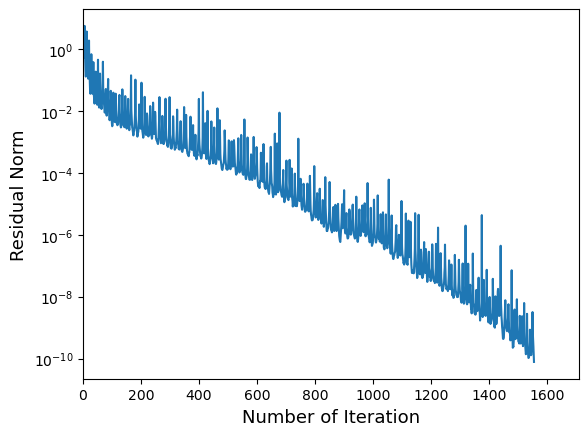

In [41]:
x, info = cg_sgpu(A, b, n, maxiter=maxiter, tol=1.0e-10, T=np.float64)
print(info)
x = cp.asnumpy(x)
print(np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ info['iterations']//10)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(cp.asnumpy(info['residual']))
info2 = cp.asnumpy(info['residual'])

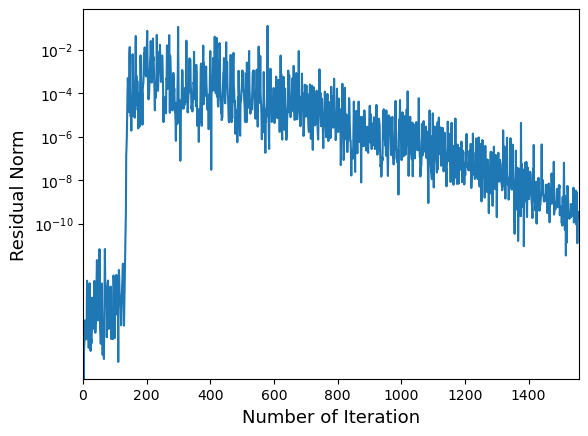

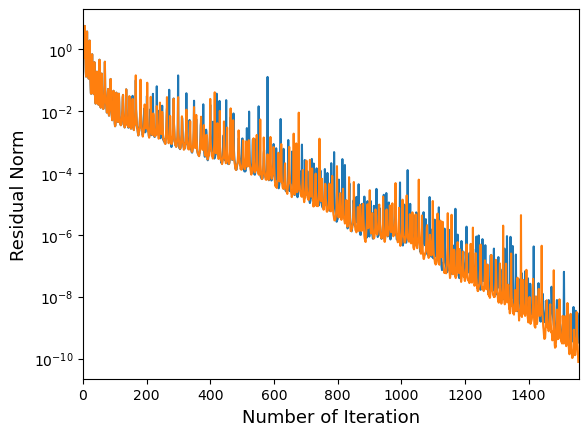

In [43]:
# difference = np.sqrt((info2[:len(info1)] - info1)**2)
difference = np.sqrt((info1[:len(info2)] - info2)**2)

plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ 2)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(difference)
plt.show()

plt.clf()

plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ 2)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(info1)
plt.plot(info2)

### VP sgpu

{'method name': 'VPGCR+GPU', 'residual': array([1.00000000e+00, 5.77965601e-01, 2.28617481e-01, ...,
       1.48256401e-10, 1.48256401e-10, 1.48256401e-10]), 'time': 153.0808198649902, 'iterations': 5601, 'inner iterations': array([49, 49, 49, ..., 49, 49, 49], dtype=int32), 'inner last residual': array([0.38886677, 2.00924715, 0.43918778, ..., 9.06762909, 9.06762909,
       9.06762909])}
1.4825608957583335e-10


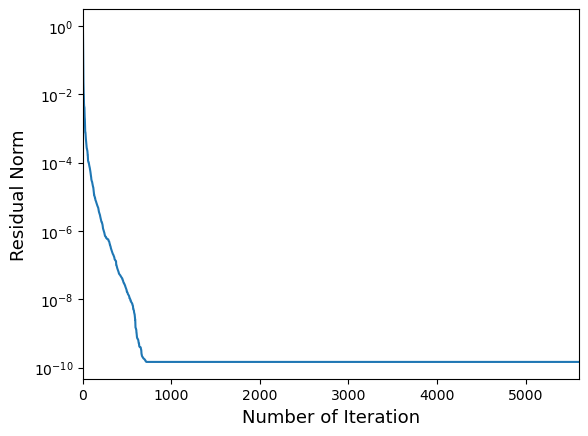

In [33]:
x, info = vpgcr_sgpu(A, b, n, maxiter, cg_sgpu, 50, inner_tol=10**(-3))
print(info)
x = cp.asnumpy(x)
print(np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+2)
plt.yscale('log')
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.plot(cp.asnumpy(info['residual']))

## Scipy

In [ ]:
# 残差履歴を保存するリスト
residuals = []
i = 0
# callback関数
def callback(residual):
    residuals.append(residual/np.linalg.norm(b))
    

x, info = scipy.sparse.linalg.gmres(A, b, tol=1e-10, maxiter=maxiter, callback=callback)

print(len(residuals))
print(np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
plt.title(r'Variation of the residual $r_{k}$ with respect to the number of iterations ${k}$. $ε=1.0 × 10^{-10}$')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$\frac{||r||}{||b||}$', fontsize=20)
plt.xlim(0, len(residuals))
plt.yscale('log')
plt.plot(residuals)


In [ ]:
i_tol = 10**(-0.1)
i_maxiter = 10

x, info = vpgcr_cpu(A, b, n, maxiter, cg_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))

print()

x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))
print()

x, info = vpgcr_cpu(A, b, n, maxiter, gmres_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))
print()

x, info = vpgmres_cpu(A, b, n, maxiter, cg_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))
print()

x, info = vpgmres_cpu(A, b, n, maxiter, gcr_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))
print()

x, info = vpgmres_cpu(A, b, n, maxiter, gmres_cpu, i_maxiter, inner_tol=i_tol)
print(f"{info["method name"]} Residual Norm :",np.linalg.norm(np.dot(A, x) - b)/np.linalg.norm(b))
print(f"{info["method name"]} Time :", info["time"])
print(f"{info["method name"]} Number of Iteration :", info["iterations"])
print(f"{info["method name"]} Inner Average Number of iratation :", np.average(info["inner iterations"]))
print(f"{info["method name"]} Inner Last Residual :", np.average(info["inner last residual"]))

## 内部反復の収束判定子によるスピードの比較と内部平均反復回数の比較

In [4]:
min_itol = -3
interval_tol = 0.25

In [5]:

# o_methods = [vpgcr_cpu, vpgmres_cpu]
# i_methods = [cg_cpu, gcr_cpu, gmres_cpu]

range_itol =10 ** np.arange(min_itol, 0, interval_tol, dtype=np.float64)
# range_iiter = [i for i in range(n)]

n_methods = 6

i_max_k = 500

m = 5
time = np.zeros((n_methods, len(range_itol)))
i_average_k = np.zeros((n_methods, len(range_itol)))
n_oiter = np.zeros((n_methods, len(range_itol)))

for i in range(m):
    k=0
    for j in range_itol:
        print(k)
        x, info = vpgcr_cpu(A, b, n, maxiter, cg_cpu, i_max_k, inner_tol=j)
        time[0, k] += info["time"]
        i_average_k[0, k] = np.average(info["inner iterations"])
        n_oiter[0, k] = info["iterations"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, i_max_k, inner_tol=j)
        time[1, k] += info["time"]
        i_average_k[1, k] = np.average(info["inner iterations"])
        n_oiter[1, k] = info["iterations"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gmres_cpu, i_max_k, inner_tol=j)
        time[2, k] += info["time"]
        i_average_k[2, k] = np.average(info["inner iterations"])
        n_oiter[2, k] = info["iterations"]

        x, info = vpgmres_cpu(A, b, n, maxiter, cg_cpu, i_max_k, inner_tol=j)
        time[3, k] += info["time"]
        i_average_k[3, k] = np.average(info["inner iterations"])
        n_oiter[3, k] = info["iterations"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gcr_cpu, i_max_k, inner_tol=j)
        time[4, k] += info["time"]
        i_average_k[4, k] = np.average(info["inner iterations"])
        n_oiter[4, k] = info["iterations"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gmres_cpu, i_max_k, inner_tol=j)
        time[5, k] += info["time"]
        i_average_k[5, k] = np.average(info["inner iterations"])
        n_oiter[5, k] = info["iterations"]
    
        k += 1

time = time/m
i_average_k = i_average_k

np.savetxt('Data/tol/time_vp_cpu.csv', time, delimiter=',')
np.savetxt('Data/tol/inner_average_k_vp_cpu.csv', i_average_k, delimiter=',')
np.savetxt('Data/tol/n_outer_iterations_cpu.csv', n_oiter, delimiter=',')

0


KeyboardInterrupt: 

11


/tmp/ipykernel_150313/3441037610.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(2.5))


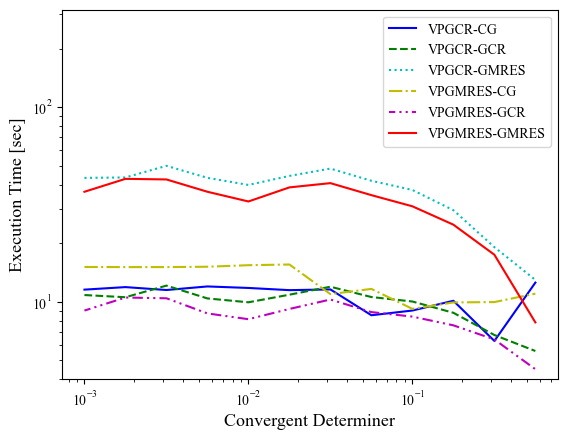

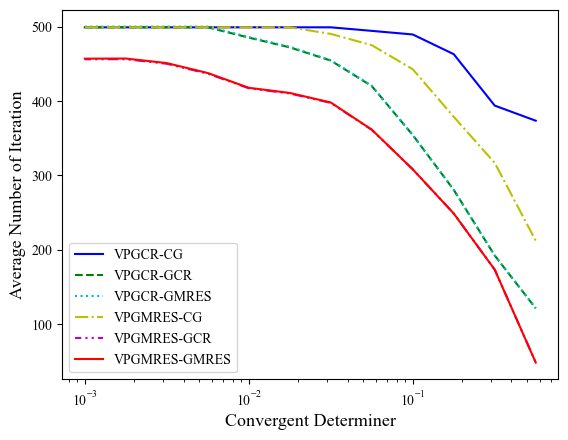

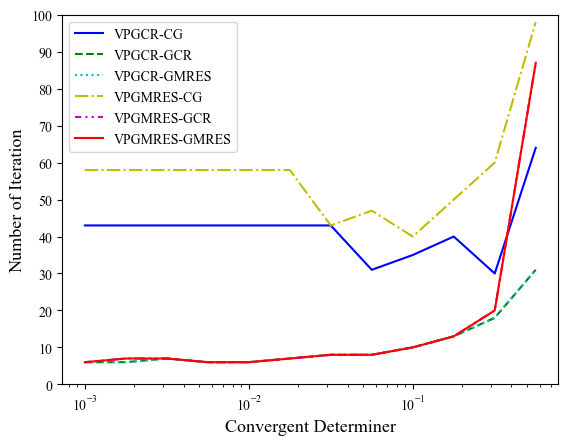

<Figure size 640x480 with 0 Axes>

In [20]:
time_vp = np.loadtxt('Data/tol/time_vp_cpu.csv', delimiter=',', dtype=np.float64)
i_average_k_vp = np.loadtxt('Data/tol/inner_average_k_vp_cpu.csv', delimiter=',', dtype=np.float64)
n_outer_iterations_vp = np.loadtxt('Data/tol/n_outer_iterations_cpu.csv', delimiter=',', dtype=np.float64)
range_itol = 10 ** np.arange(min_itol, 0, interval_tol, dtype=np.float64)

linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]

print(np.argmin(np.sum(time_vp, axis=0)))

for i in range(6):
    plt.plot(range_itol, time_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Execution Time [sec]', fontsize=13)
plt.ylim(0, 10**(2.5))
plt.yticks([10**i for i in range(1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("itol_cpu1.pdf")
plt.show()
plt.clf()

for i in range(6):
    plt.plot(range_itol, i_average_k_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.xscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Average Number of Iteration', fontsize=13)
plt.legend(fontsize=10)
plt.savefig("itol_cpu2.pdf")
plt.show()
plt.clf()

for i in range(6):
    plt.plot(range_itol, n_outer_iterations_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.xscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Number of Iteration', fontsize=13)
plt.ylim(0, 100)
plt.yticks([i for i in range(0, 110, 10)]) 
plt.legend(fontsize=10)
plt.savefig("itol_cpu3.pdf")
plt.show()
plt.clf()

### GPU

In [ ]:

# o_methods = [vpgcr_cpu, vpgmres_cpu]
# i_methods = [cg_cpu, gcr_cpu, gmres_cpu]

range_itol =10 ** cp.arange(min_itol, 0, interval_tol, dtype=np.float64)
# range_iiter = [i for i in range(n)]

i_max_k = 500
n_methods = 6

m = 5
time = cp.zeros((n_methods, len(range_itol)))
i_average_k = cp.zeros((n_methods, len(range_itol)))
n_oiter = cp.zeros((n_methods, len(range_itol)))

for i in range(m):
    k=0
    for j in range_itol:
        print(k)
        x, info = vpgcr_sgpu(A, b, n, maxiter, cg_sgpu, i_max_k, inner_tol=j)
        time[0, k] += info["time"]
        i_average_k[0, k] = cp.average(info["inner iterations"])
        n_oiter[0, k] = info["iterations"]

        x, info = vpgcr_sgpu(A, b, n, maxiter, gcr_sgpu, i_max_k, inner_tol=j)
        time[1, k] += info["time"]
        i_average_k[1, k] = cp.average(info["inner iterations"])
        n_oiter[1, k] = info["iterations"]

        x, info = vpgcr_sgpu(A, b, n, maxiter, gmres_sgpu, i_max_k, inner_tol=j)
        time[2, k] += info["time"]
        i_average_k[2, k] = cp.average(info["inner iterations"])
        n_oiter[2, k] = info["iterations"]

        x, info = vpgmres_sgpu(A, b, n, maxiter, cg_sgpu, i_max_k, inner_tol=j)
        time[3, k] += info["time"]
        i_average_k[3, k] = cp.average(info["inner iterations"])
        n_oiter[3, k] = info["iterations"]

        x, info = vpgmres_sgpu(A, b, n, maxiter, gcr_sgpu, i_max_k, inner_tol=j)
        time[4, k] += info["time"]
        i_average_k[4, k] = cp.average(info["inner iterations"])
        n_oiter[4, k] = info["iterations"]

        x, info = vpgmres_sgpu(A, b, n, maxiter, gmres_sgpu, i_max_k, inner_tol=j)
        time[5, k] += info["time"]
        i_average_k[5, k] = cp.average(info["inner iterations"])
        n_oiter[5, k] = info["iterations"]
    
        k += 1

time = time/m
i_average_k = i_average_k

np.savetxt('Data/tol/time_vp_sgpu.csv', cp.asnumpy(time), delimiter=',')
np.savetxt('Data/tol/inner_average_k_vp_sgpu.csv', cp.asnumpy(i_average_k), delimiter=',')
np.savetxt('Data/tol/n_outer_iterations_sgpu.csv', cp.asnumpy(n_oiter), delimiter=',')

11


/tmp/ipykernel_150313/1322421467.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(2.5))


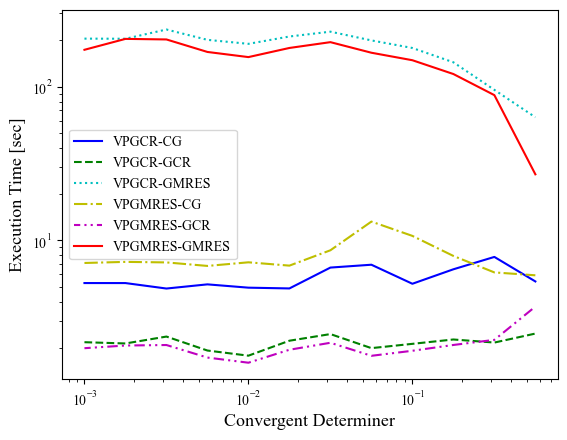

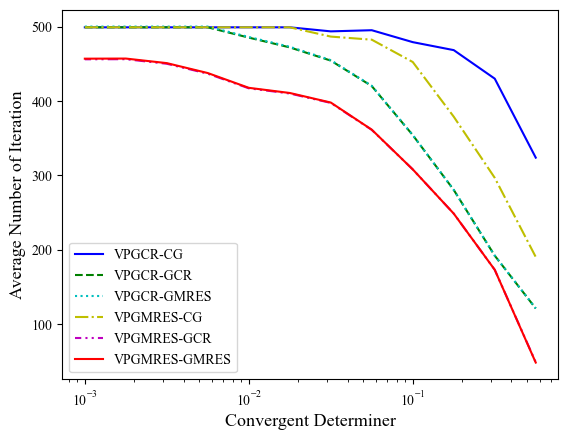

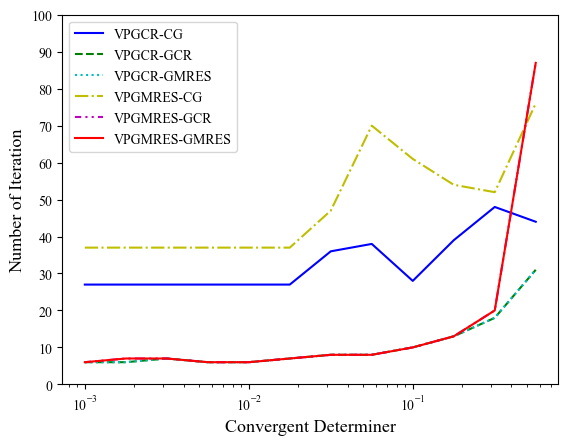

<Figure size 640x480 with 0 Axes>

In [6]:
time_vp = np.loadtxt('Data/tol/time_vp_sgpu.csv', delimiter=',', dtype=np.float64)
i_average_k_vp = np.loadtxt('Data/tol/inner_average_k_vp_sgpu.csv', delimiter=',', dtype=np.float64)
n_outer_iterations_vp = np.loadtxt('Data/tol/n_outer_iterations_sgpu.csv', delimiter=',', dtype=np.float64)
range_itol = cp.asnumpy(10 ** cp.arange(min_itol, 0, interval_tol, dtype=np.float64))

linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]

print(np.argmin(np.sum(time_vp, axis=0)))

for i in range(6):
    plt.plot(range_itol, time_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
  
plt.rcParams['font.family'] = 'Times New Roman'  
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Execution Time [sec]', fontsize=13)
plt.ylim(0, 10**(2.5))
plt.yticks([10**i for i in range(1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("itol_sgpu1.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_itol, i_average_k_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.xscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Average Number of Iteration', fontsize=13)
plt.legend(fontsize=10)
plt.savefig("itol_sgpu2.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_itol, n_outer_iterations_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.xscale('log')
plt.xlabel('Convergent Determiner', fontsize=13)
plt.ylabel('Number of Iteration', fontsize=13)
plt.ylim(0, 100)
plt.yticks([i for i in range(0, 110, 10)]) 
plt.legend(fontsize=10)
plt.savefig("itol_sgpu3.pdf")
plt.show()

plt.clf()

## 内部反復の最大反復回数によるスピードの比較と平均最終残差の比較

In [7]:
max_iiter = 500
interval_iter = 50
cg_min = 110

In [10]:
# o_methods = [vpgcr_cpu, vpgmres_cpu]
# i_methods = [cg_cpu, gcr_cpu, gmres_cpu]

# range_itol =10 ** np.arange(min_itol, 0, interval_tol, dtype=np.float64)
range_iiter = [i for i in range(interval_iter, max_iiter+1, interval_iter)]

n_methods = 6

itol = 10**(-3)

m = 1
time = np.zeros((n_methods, len(range_iiter)))
i_average_res = np.zeros((n_methods, len(range_iiter)))
n_oiter = np.zeros((n_methods, len(range_iiter)))

for i in range(m):
    k=0
    for j in range_iiter:
        print(k)
        
        x, info = vpgcr_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
        time[0, k] += info["time"]
        i_average_res[0, k] = np.average(info["inner last residual"])
        n_oiter[0, k] = info["iterations"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
        time[1, k] += info["time"]
        i_average_res[1, k] = np.average(info["inner last residual"])
        n_oiter[1, k] = info["iterations"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
        time[2, k] += info["time"]
        i_average_res[2, k] = np.average(info["inner last residual"])
        n_oiter[2, k] = info["iterations"]

    
        x, info = vpgmres_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
        time[3, k] += info["time"]
        i_average_res[3, k] = np.average(info["inner last residual"])
        n_oiter[3, k] = info["iterations"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
        time[4, k] += info["time"]
        i_average_res[4, k] = np.average(info["inner last residual"])
        n_oiter[4, k] = info["iterations"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
        time[5, k] += info["time"]
        i_average_res[5, k] = np.average(info["inner last residual"])
        n_oiter[5, k] = info["iterations"]
    
        k += 1

time = time/m
i_average_res = i_average_res

np.savetxt('Data/iter/time_vp_cpu.csv', time, delimiter=',')
np.savetxt('Data/iter/inner_average_res_vp_cpu.csv', i_average_res, delimiter=',')
np.savetxt('Data/iter/n_outer_iterations_cpu.csv', n_oiter, delimiter=',')

0


NameError: name 'A' is not defined

2


/tmp/ipykernel_150313/353234879.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(3))


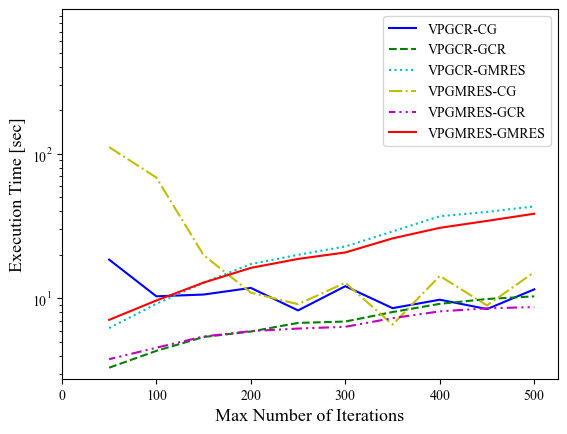

/tmp/ipykernel_150313/353234879.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(2.2))


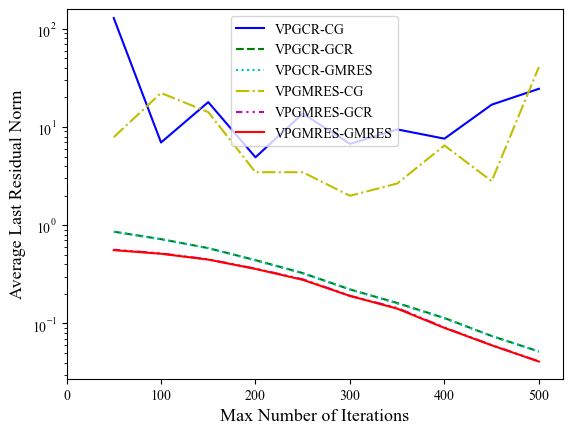

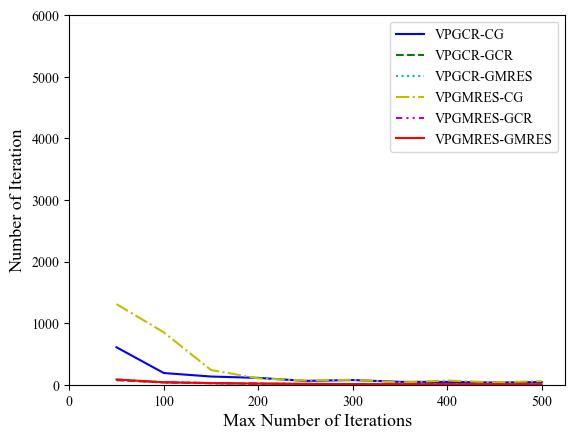

<Figure size 640x480 with 0 Axes>

In [8]:
time_vp = np.loadtxt('Data/iter/time_vp_cpu.csv', delimiter=',', dtype=np.float64)
i_average_res_vp = np.loadtxt('Data/iter/inner_average_res_vp_cpu.csv', delimiter=',', dtype=np.float64)
n_outer_iterations_vp = np.loadtxt('Data/iter/n_outer_iterations_cpu.csv', delimiter=',', dtype=np.float64)
range_iiter = [i for i in range(interval_iter, max_iiter+1, interval_iter)]

linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]

print(np.argmin(np.sum(time_vp, axis=0)))

for i in range(6):
    plt.plot(range_iiter, time_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Execution Time [sec]', fontsize=13)
plt.ylim(0, 10**(3))
plt.yticks([10**i for i in range(1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("iiter_cpu1.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_iiter, i_average_res_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Average Last Residual Norm', fontsize=13)
plt.ylim(0, 10**(2.2))
plt.yticks([10**i for i in range(-1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("iiter_cpu2.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_iiter, n_outer_iterations_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
# plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Number of Iteration', fontsize=13)
plt.ylim(0, 6000)
plt.legend(fontsize=10)
plt.savefig("iiter_cpu3.pdf")
plt.show()

plt.clf()

### GPU

In [38]:
# o_methods = [vpgcr_cpu, vpgmres_cpu]
# i_methods = [cg_cpu, gcr_cpu, gmres_cpu]

# range_itol =10 ** np.arange(min_itol, 0, interval_tol, dtype=np.float64)
range_iiter = [i for i in range(interval_iter, max_iiter+1, interval_iter)]

n_methods = 6

itol = 10**(-3)

m = 1
time = cp.zeros((n_methods, len(range_iiter)))
i_average_res = cp.zeros((n_methods, len(range_iiter)))
n_oiter = cp.zeros((n_methods, len(range_iiter)))


for i in range(m):
    k=0
    for j in range_iiter:
        print(k)
        x, info = vpgcr_sgpu(A, b, n, maxiter, cg_sgpu, j, inner_tol=itol)
        time[0, k] += info["time"]
        i_average_res[0, k] = cp.average(info["inner last residual"])
        n_oiter[0, k] = info["iterations"]

        x, info = vpgcr_sgpu(A, b, n, maxiter, gcr_sgpu, j, inner_tol=itol)
        time[1, k] += info["time"]
        i_average_res[1, k] = cp.average(info["inner last residual"])
        n_oiter[1, k] = info["iterations"]

        x, info = vpgcr_sgpu(A, b, n, maxiter, gmres_sgpu, j, inner_tol=itol)
        time[2, k] += info["time"]
        i_average_res[2, k] = cp.average(info["inner last residual"])
        n_oiter[2, k] = info["iterations"]

        
        x, info = vpgmres_sgpu(A, b, n, maxiter, cg_sgpu, j, inner_tol=itol)
        time[3, k] += info["time"]
        i_average_res[3, k] = cp.average(info["inner last residual"])
        n_oiter[3, k] = info["iterations"]

        x, info = vpgmres_sgpu(A, b, n, maxiter, gcr_sgpu, j, inner_tol=itol)
        time[4, k] += info["time"]
        i_average_res[4, k] = cp.average(info["inner last residual"])
        n_oiter[4, k] = info["iterations"]

        x, info = vpgmres_sgpu(A, b, n, maxiter, gmres_sgpu, j, inner_tol=itol)
        time[5, k] += info["time"]
        i_average_res[5, k] = cp.average(info["inner last residual"])
        n_oiter[5, k] = info["iterations"]
    
        k += 1

time = time/m
i_average_res = i_average_res

np.savetxt('Data/iter/time_vp_sgpu.csv', cp.asnumpy(time), delimiter=',')
np.savetxt('Data/iter/inner_average_res_vp_sgpu.csv', cp.asnumpy(i_average_res), delimiter=',')
np.savetxt('Data/iter/n_outer_iterations_sgpu.csv', n_oiter, delimiter=',')

2
0


KeyboardInterrupt: 

2


/tmp/ipykernel_150313/3630976992.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(3))


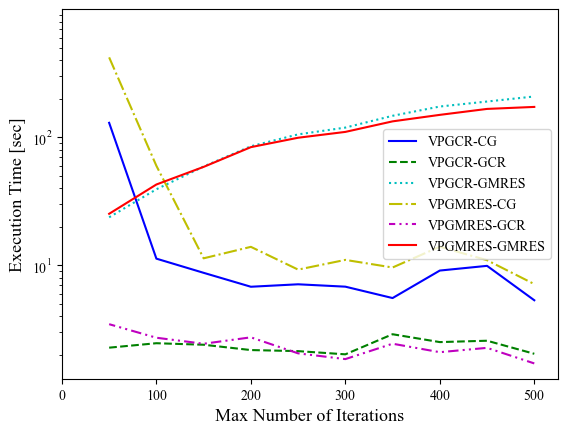

/tmp/ipykernel_150313/3630976992.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10**(2.2))


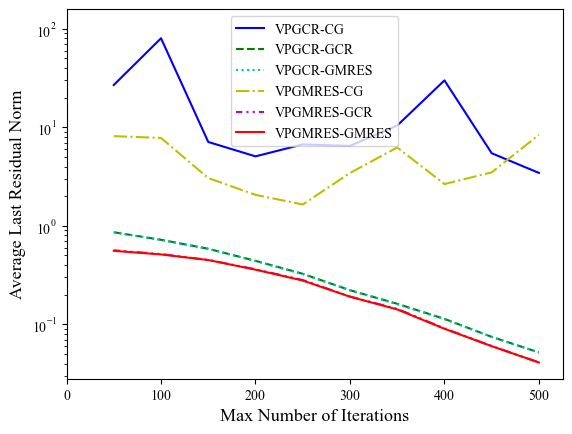

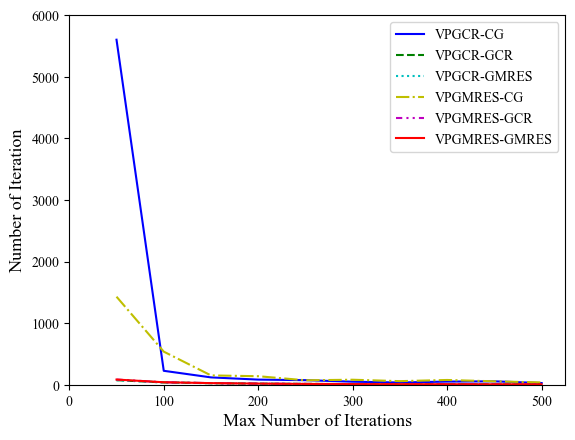

<Figure size 640x480 with 0 Axes>

In [9]:
time_vp = np.loadtxt('Data/iter/time_vp_sgpu.csv', delimiter=',', dtype=np.float64)
i_average_res_vp = np.loadtxt('Data/iter/inner_average_res_vp_sgpu.csv', delimiter=',', dtype=np.float64)
n_outer_iterations_vp = np.loadtxt('Data/iter/n_outer_iterations_sgpu.csv', delimiter=',', dtype=np.float64)
range_iiter = [i for i in range(interval_iter, max_iiter+1, interval_iter)]

linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]

print(np.argmin(np.sum(time_vp, axis=0)))

for i in range(6):
    plt.plot(range_iiter, time_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Execution Time [sec]', fontsize=13)
plt.ylim(0, 10**(3))
plt.yticks([10**i for i in range(1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("iiter_sgpu1.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_iiter, i_average_res_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Average Last Residual Norm', fontsize=13)
plt.ylim(0, 10**(2.2))
plt.yticks([10**i for i in range(-1, 3)]) 
plt.legend(fontsize=10)
plt.savefig("iiter_sgpu2.pdf")
plt.show()

plt.clf()

for i in range(6):
    plt.plot(range_iiter, n_outer_iterations_vp[i], color=coloers[i],linestyle=linestyles[i], label=method_name[i])
    
plt.rcParams['font.family'] = 'Times New Roman'
# plt.yscale('log')
plt.xlabel('Max Number of Iterations', fontsize=13)
plt.xlim(0, 525)
plt.xticks([i for i in range(0, 510, 100)]) 
plt.ylabel('Number of Iteration', fontsize=13)
plt.ylim(0, 6000)
plt.legend(fontsize=10)
plt.savefig("iiter_sgpu3.pdf")
plt.show()

plt.clf()

## 内部反復解法の最適パラメータ

In [ ]:
# o_methods = [vpgcr_cpu, vpgmres_cpu]
# i_methods = [cg_cpu, gcr_cpu, gmres_cpu]

range_itol =10 ** np.arange(min_itol, 0, interval_tol, dtype=np.float64)
range_iiter = [i for i in range(interval_iter, max_iiter+1, interval_iter)]

n_methods = 6


m = 10

gcr_cg = np.zeros((len(range_itol), len(range_iiter)))
gcr_gcr = np.zeros((len(range_itol), len(range_iiter)))
gcr_gmres = np.zeros((len(range_itol), len(range_iiter)))
gmres_cg = np.zeros((len(range_itol), len(range_iiter)))
gmres_gcr = np.zeros((len(range_itol), len(range_iiter)))
gmres_gmres = np.zeros((len(range_itol), len(range_iiter)))

l = 0
for i in range_itol:
    k=0
    for j in range_iiter:
        print(k)
        x, info = vpgcr_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
        gcr_cg[l, k] += info["time"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
        gcr_gcr[l, k] += info["time"]

        x, info = vpgcr_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
        gcr_gmres[l, k] += info["time"]


        x, info = vpgmres_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
        gmres_cg[l, k] += info["time"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
        gmres_gcr[l, k] += info["time"]

        x, info = vpgmres_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
        gmres_gmres[l, k] += info["time"]
    
        k += 1
    l +=1


np.savetxt('Data/param/gcr_cg.csv', gcr_cg, delimiter=',')
np.savetxt('Data/param/gcr_gcr.csv', gcr_gcr, delimiter=',')
np.savetxt('Data/param/gcr_gmres.csv', gcr_gmres, delimiter=',')
np.savetxt('Data/param/gmres_cg.csv', gmres_cg, delimiter=',')
np.savetxt('Data/param/gmres_gcr.csv', gmres_gcr, delimiter=',')
np.savetxt('Data/param/gmres_gmres.csv', gmres_gmres, delimiter=',')

In [ ]:
time_gcr_cg_cpu = np.loadtxt('Data/param/gcr_cg_cpu.csv', delimiter=',', dtype=np.float64)
time_gcr_gcr_cpu =np.loadtxt('Data/param/gcr_gcr_cpu.csv', delimiter=',', dtype=np.float64)
time_gcr_gmres_cpu =np.loadtxt('Data/param/gcr_gmres_cpu.csv', delimiter=',', dtype=np.float64)
time_gmres_cg_cpu =np.loadtxt('Data/param/gmres_cg_cpu.csv', delimiter=',', dtype=np.float64)
time_gmres_gcr_cpu =np.loadtxt('Data/param/gmres_gcr_cpu.csv', delimiter=',', dtype=np.float64)
time_gmres_gmres_cpu =np.loadtxt('Data/param/gmres_gmres_cpu.csv', delimiter=',', dtype=np.float64)

print(np.argmin(time_gcr_cg_cpu))
print(np.argmin(time_gcr_gcr_cpu))
print(np.argmin(time_gcr_gmres_cpu))
print(np.argmin(time_gmres_cg_cpu))
print(np.argmin(time_gmres_gcr_cpu))
print(np.argmin(time_gmres_gmres_cpu))
print()

In [4]:
j = 150
itol = 10**(-0.25)

VPGCR-CG 10.300625748001039
iter 130

VPGCR-GCR 5.452857865020633
iter 34

VPGMRES-CG 11.975035598967224
iter 214

VPGMRES-GCR 4.352527306065895
iter 87



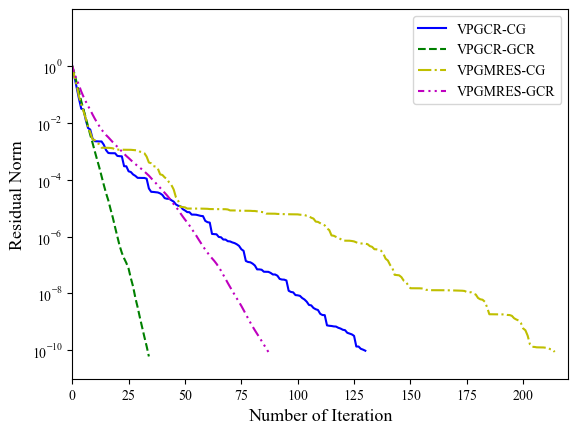

<Figure size 640x480 with 0 Axes>

In [6]:
linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]


# x, info = cg_cpu(A, b, n, maxiter, tol=1.0e-10)
# plt.plot(info['residual'], color=coloers[0],linestyle=linestyles[0], label="CG")
# print(info["method name"], info["time"])
# print("iter", info["iterations"])
# print()

# x, info =gcr_cpu(A, b, n, maxiter, tol=1.0e-10)
# plt.plot(info['residual'], color=coloers[1],linestyle=linestyles[1], label="GCR")
# print(info["method name"], info["time"])
# print("iter", info["iterations"])
# print()

# x, info =gmres_cpu(A, b, n, maxiter, tol=1.0e-10)
# plt.plot(info['residual'], color=coloers[2],linestyle=linestyles[2], label="GMRES")
# print(info["method name"], info["time"])
# print("iter", info["iterations"])
# print()
    
    
x, info = vpgcr_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
plt.plot(info['residual'], color=coloers[0],linestyle=linestyles[0], label=method_name[0])
print(method_name[0], info["time"])
print("iter", info["iterations"])
print()

x, info = vpgcr_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
plt.plot(info['residual'], color=coloers[1],linestyle=linestyles[1], label=method_name[1])
print(method_name[1], info["time"])
print("iter", info["iterations"])
print()

# x, info = vpgcr_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
# plt.plot(info['residual'], color=coloers[2],linestyle=linestyles[2], label=method_name[2])
# print(method_name[2], info["time"])
# print("iter", info["iterations"])
# print()

x, info = vpgmres_cpu(A, b, n, maxiter, cg_cpu, j, inner_tol=itol)
plt.plot(info['residual'], color=coloers[3],linestyle=linestyles[3], label=method_name[3])
print(method_name[3], info["time"])
print("iter", info["iterations"])
print()

x, info = vpgmres_cpu(A, b, n, maxiter, gcr_cpu, j, inner_tol=itol)
plt.plot(info['residual'], color=coloers[4],linestyle=linestyles[4], label=method_name[4])
print(method_name[4], info["time"])
print("iter", info["iterations"])
print()

# x, info = vpgmres_cpu(A, b, n, maxiter, gmres_cpu, j, inner_tol=itol)
# plt.plot(info['residual'], color=coloers[5],linestyle=linestyles[5], label=method_name[5])
# print(method_name[5], info["time"])
# print("iter", info["iterations"])
# print()
    

plt.rcParams['font.family'] = 'Times New Roman'
plt.legend(fontsize=7)
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
# plt.xlim(0, info['iterations']+ info['iterations']//10)
plt.xlim(0, 220)
plt.yscale('log')
plt.ylim(10**(-11), 10**(2)) 
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.legend(fontsize=10, loc = "upper right")
# plt.savefig("iteration methods cpu.pdf")
plt.savefig("Vps cpu.pdf")
plt.show()
plt.clf()



CG 2.1807858379906975
iter 5601

GCR + GPU 1.08404269895982
iter 1429

GMRES + GPU 393.7272025270504
iter 1429



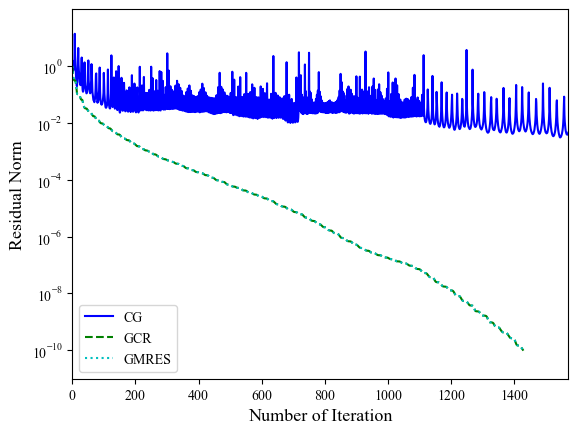

<Figure size 640x480 with 0 Axes>

In [18]:
linestyles = ["-", "--", ":", "-.", (2,(5,2,1,2,1,2)), "-"]
coloers = ["b", "g", "c", "y", "m" ,"r"]
method_name = ["VPGCR-CG","VPGCR-GCR","VPGCR-GMRES","VPGMRES-CG","VPGMRES-GCR","VPGMRES-GMRES"]


x, info = cg_sgpu(A, b, n, maxiter, tol=1.0e-10)
plt.plot(cp.asnumpy(info['residual']), color=coloers[0],linestyle=linestyles[0], label="CG")
print(info["method name"], info["time"])
print("iter", info["iterations"])
print()

x, info =gcr_sgpu(A, b, n, maxiter, tol=1.0e-10)
plt.plot(cp.asnumpy(info['residual']), color=coloers[1],linestyle=linestyles[1], label="GCR")
print(info["method name"], info["time"])
print("iter", info["iterations"])
print()

x, info =gmres_sgpu(A, b, n, maxiter, tol=1.0e-10)
plt.plot(cp.asnumpy(info['residual']), color=coloers[2],linestyle=linestyles[2], label="GMRES")
print(info["method name"], info["time"])
print("iter", info["iterations"])
print()
    

# x, info = vpgcr_sgpu(A, b, n, maxiter, cg_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[0],linestyle=linestyles[0], label=method_name[0])
# print(method_name[0], info["time"])
# print("iter", info["iterations"])
# print()

# x, info = vpgcr_sgpu(A, b, n, maxiter, gcr_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[1],linestyle=linestyles[1], label=method_name[1])
# print(method_name[1], info["time"])
# print("iter", info["iterations"])
# print()

# x, info = vpgcr_sgpu(A, b, n, maxiter, gmres_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[2],linestyle=linestyles[2], label=method_name[2])
# print(method_name[2], info["time"])
# print("iter", info["iterations"])
# print()

# x, info = vpgmres_sgpu(A, b, n, maxiter, cg_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[3],linestyle=linestyles[3], label=method_name[3])
# print(method_name[3], info["time"])
# print("iter", info["iterations"])
# print()

# x, info = vpgmres_sgpu(A, b, n, maxiter, gcr_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[4],linestyle=linestyles[4], label=method_name[4])
# print(method_name[4], info["time"])
# print("iter", info["iterations"])
# print()

# x, info = vpgmres_sgpu(A, b, n, maxiter, gmres_sgpu, j, inner_tol=itol)
# plt.plot(cp.asnumpy(info['residual']), color=coloers[5],linestyle=linestyles[5], label=method_name[5])
# print(method_name[5], info["time"])
# print("iter", info["iterations"])
# print()
    

plt.rcParams['font.family'] = 'Times New Roman'
plt.legend(fontsize=7)
plt.xlabel('Number of Iteration', fontsize=13)
plt.ylabel('Residual Norm', fontsize=13)
plt.xlim(0, info['iterations']+ info['iterations']//10)
# plt.xlim(0, 220)
plt.yscale('log')
plt.ylim(10**(-11), 10**(2)) 
plt.yticks([10**i for i in range(0, -12, -2)]) 
plt.legend(fontsize=10, loc = "lower left")
plt.savefig("iteration methods sgpu.pdf")
# plt.savefig("Vps sgpu.pdf")
plt.show()
plt.clf()

